# Big H.W #1
<br>Nemer Nseir 322626896<br>
<br>Noy Tzivin 314778630<br>
<br>Adi Froimovich 318173879<br>
# 1) Our research question 
### What is the relationship between GDP and the Ladder score of a country, and how does a change in GDP affect the Ladder score? <br> 
The other five factors are social support, life expectancy, freedom, absence of corruption, and generosity.<br>

# 2) Data source
#### The source is [Kaggle](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021) 
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

### About our data
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more

#### Importing main libraries & checking our df

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


### Cleaning some noise from the data

In [3]:

df=df[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy',
       'Freedom to make life choices','Generosity','Perceptions of corruption']]
df.head(2)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179


# 3) what the i observation means ?
every i observation represents a country 

In [4]:
df.head(2)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179


In [5]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### no null's in our df

In [6]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
Logged GDP per capita           float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

### Our variables are floats (numeric) except for the counrty name & Regional indicator

In [7]:
def course_func(df):
    dat=pd.DataFrame({'Variable':[i for i in(df.columns.to_list())]
                      ,'N':[i for i in(df.columns.to_list())]
                      ,'Mean':[i for i in(df.columns.to_list())]
                      ,'St.Dev':[i for i in(df.columns.to_list())]
                      ,'Min':[i for i in(df.columns.to_list())]
                      ,'Max':[i for i in(df.columns.to_list())]})
    for i in range(0,len(df.columns)):
        dat.iloc[i,1] = len(df.iloc[:,i])
        dat.iloc[i,2] = df.iloc[:,i].mean()
        dat.iloc[i,3] = df.iloc[:,i].std()
        dat.iloc[i,4] = df.iloc[:,i].min()
        dat.iloc[i,5] = df.iloc[:,i].max()
    dat.set_index('Variable',inplace=True)    
    return dat


# 4) Descriptive statistics

In [8]:
course_func(df.iloc[:,2:])

,N,Mean,St.Dev,Min,Max
Variable,,,,,
Ladder score,149,5.532839,1.073924,2.523,7.842
Logged GDP per capita,149,9.432208,1.158601,6.635,11.647
Social support,149,0.814745,0.114889,0.463,0.983
Healthy life expectancy,149,64.992799,6.762043,48.478,76.953
Freedom to make life choices,149,0.791597,0.113332,0.382,0.97
Generosity,149,-0.015134,0.150657,-0.288,0.542
Perceptions of corruption,149,0.72745,0.179226,0.082,0.939


# 5) Distributions of variables

[(2.2, 8.5), Text(0.5, 1.0, 'Distribution of Ladder score')]

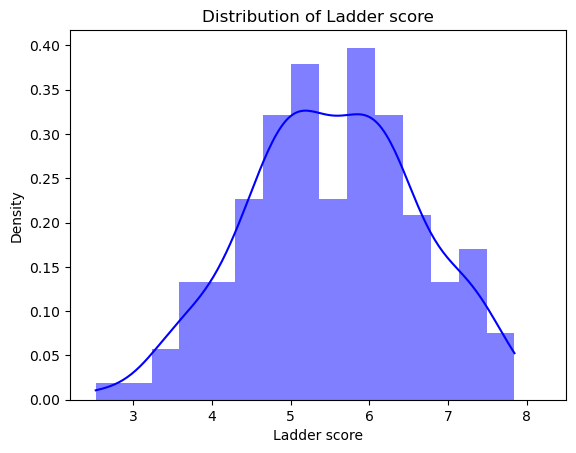

In [9]:
g=sns.histplot(df['Ladder score'],bins=15,kde=True,stat="density", linewidth=0,color='b')
g.set(xlim=(2.2, 8.5),title='Distribution of Ladder score')

[(6.0, 12.0), Text(0.5, 1.0, 'Distribution of GDP per capita')]

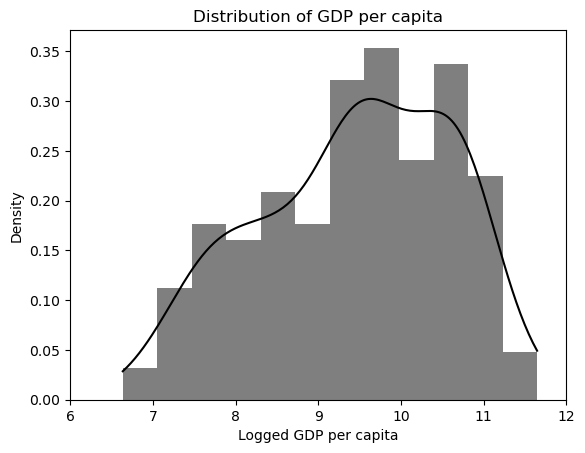

In [10]:
g=sns.histplot(df['Logged GDP per capita'],bins=12,kde=True,stat="density", linewidth=0,color='black')
g.set(xlim=(6, 12),title='Distribution of GDP per capita')

### 6) we chose the life expentancy and divided it to 2 catrgories Die Younger,Die Older

In [11]:
df['Healthy life expectancy'].max()

76.953

In [12]:
df['Healthy life expectancy'].mean()

64.99279865771811

In [13]:
bins = [48.478,64.99279865771811,76.953]
names = ['Die Younger','Die Older']

df['New_col'] = pd.cut(df['Healthy life expectancy'], bins, labels=names)

In [14]:
df['New_col']

0        Die Older
1        Die Older
2        Die Older
3        Die Older
4        Die Older
          ...     
144    Die Younger
145    Die Younger
146    Die Younger
147    Die Younger
148    Die Younger
Name: New_col, Length: 149, dtype: category
Categories (2, object): ['Die Younger' < 'Die Older']

<AxesSubplot:xlabel='New_col', ylabel='count'>

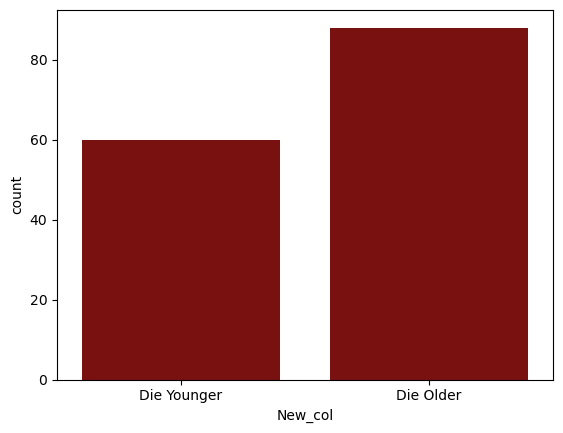

In [15]:
sns.countplot(x='New_col',data=df,color='darkred')

In [16]:
df['New_col'].value_counts()

Die Older      88
Die Younger    60
Name: New_col, dtype: int64

#### We chose perceptions of corruption as the numeric variable

In [17]:
df['Perceptions of corruption'].quantile(q=0.50)

0.781

In [18]:
df['Perceptions of corruption'].quantile(q=0.25)

0.667

In [19]:
df['Perceptions of corruption'].quantile(q=0.75)

0.845

[(0.1, 0.95), Text(0.5, 1.0, 'Perceptions of corruption distribution')]

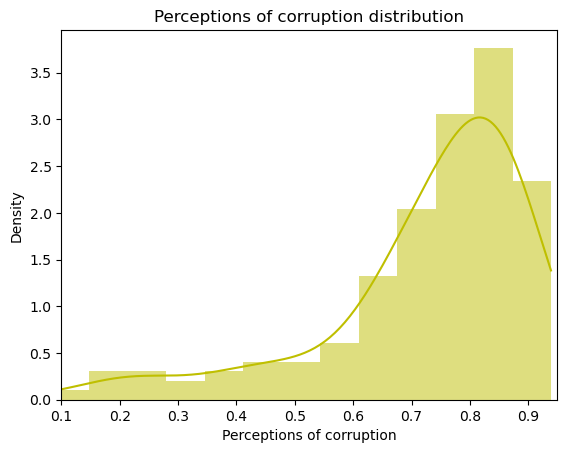

In [20]:
g=sns.histplot(df['Perceptions of corruption'],kde=True,stat="density", linewidth=0,color='y')
g.set(xlim=(0.1,0.95),title='Perceptions of corruption distribution')

### 7) We chose social support and divide him by Low,Medium,High

In [21]:
df['Social support'].min()

0.463

In [22]:
df['Social support'].max()

0.983

In [23]:
bins = [0.462,0.6,0.8,0.983]
names = ['Low','Medium','High']
df['Social support by name'] = pd.cut(df['Social support'], bins, labels=names)

In [24]:
df.head(2)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,New_col,Social support by name
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,Die Older,High
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,Die Older,High


In [25]:
df['Social support by name'].value_counts()

High      96
Medium    45
Low        8
Name: Social support by name, dtype: int64

# 8)

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Ladder score'>

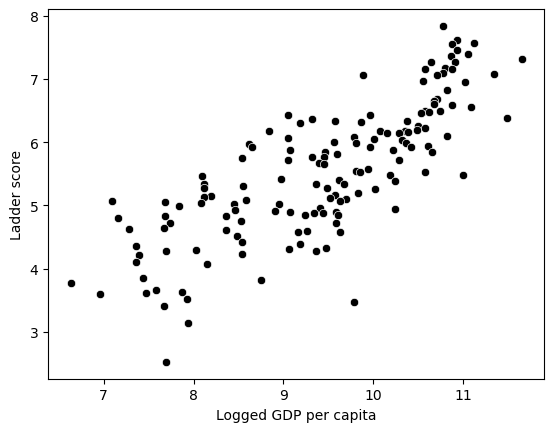

In [26]:
sns.scatterplot(y='Ladder score',x='Logged GDP per capita',data=df,color='black')

### The connection looks linear and close to corr of 1 

In [27]:
df['Ladder score'].corr(df['Logged GDP per capita'])

0.7897596965098931

# 9)

In [28]:
df.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


### Corr heatmap

<AxesSubplot:>

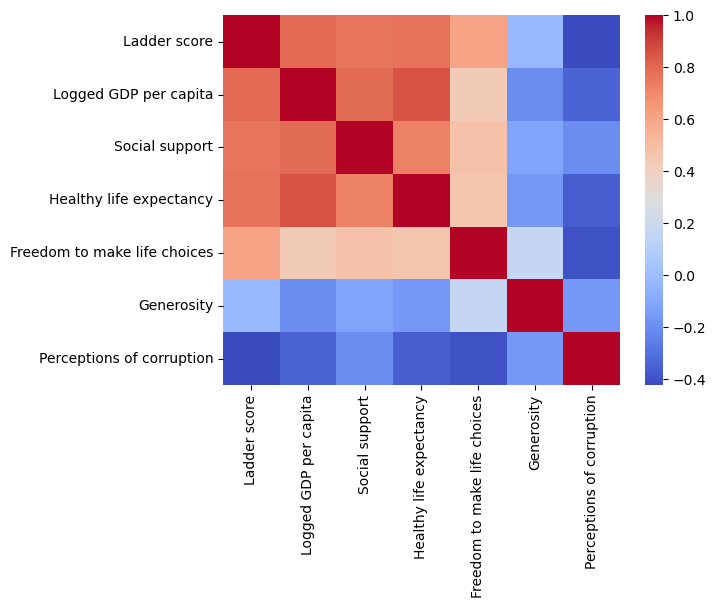

In [29]:
sns.heatmap(df.corr(),cmap='coolwarm')

# Section number 2 :

# 10)
The main connection (we used in question 8) is already linear (adding scatter plot) because in our data the GDP PER CAPITA is already in a logged form . for this question we will use a different explanaroty variable - Perceptions of corruption.

[Text(0.5, 1.0, 'Ladder score explained by Logged GDP per capita')]

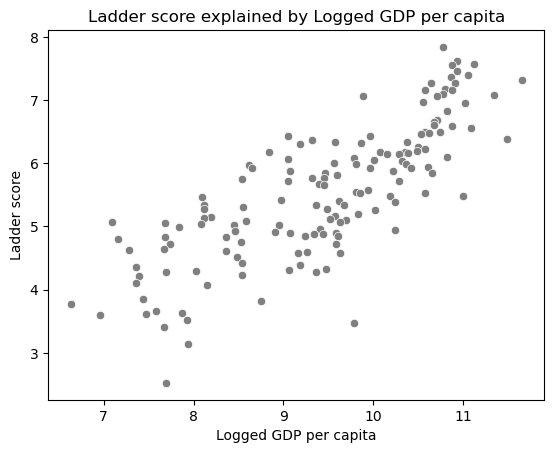

In [30]:
sns.scatterplot(y='Ladder score',x='Logged GDP per capita',data=df,color='grey').set(title='Ladder score explained by Logged GDP per capita')

### Changing to Perceptions of corruption.

[Text(0.5, 1.0, 'LEVEL-LEVEL MODEL')]

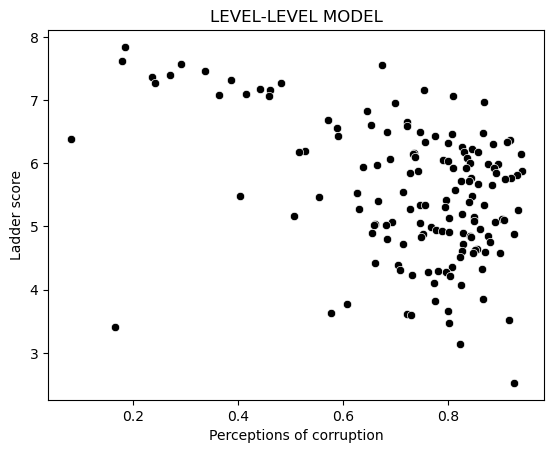

In [31]:
sns.scatterplot(y='Ladder score',x='Perceptions of corruption',data=df,color='black').set(title='LEVEL-LEVEL MODEL')


[Text(0.5, 1.0, 'LEVEL-LOG MODEL')]

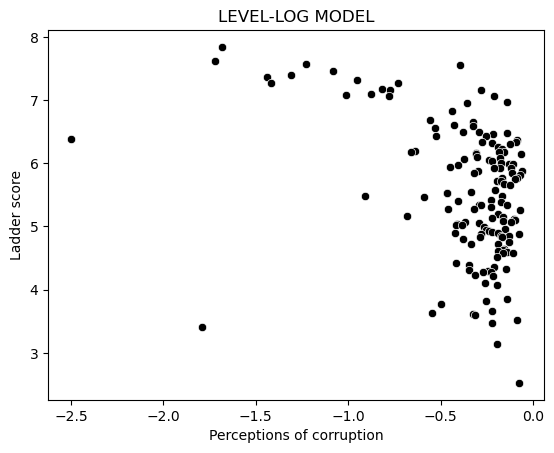

In [32]:
sns.scatterplot(y=df['Ladder score'],x=np.log(df['Perceptions of corruption']),color='black').set(title='LEVEL-LOG MODEL')

 Indeed after we made LEVEL-LOG model , we can see that the connection still not looks in a linear form.<br>
 We tried to make all of the fransformations, none of them helped - for Generosity & Perceptions of corruption (the only non linear connections in our data).<br>
#### We added graphs below to show all of the connections in our Data.

Text(0.5, 1.0, 'Perceptions of corruption')

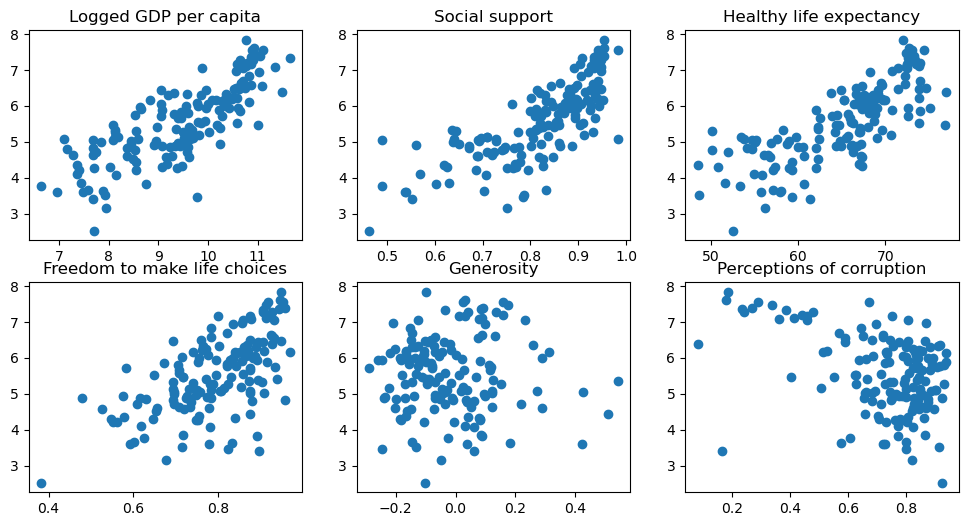

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(12,6))
      
axes[0,0].scatter(df['Logged GDP per capita'], df['Ladder score'])
axes[0,0].set_title("Logged GDP per capita")

axes[0,1].scatter(df['Social support'], df['Ladder score'])
axes[0,1].set_title("Social support")

axes[0,2].scatter(df['Healthy life expectancy'], df['Ladder score'])
axes[0,2].set_title("Healthy life expectancy")

axes[1,0].scatter(df['Freedom to make life choices'], df['Ladder score'])
axes[1,0].set_title("Freedom to make life choices")

axes[1,1].scatter(df['Generosity'], df['Ladder score'])
axes[1,1].set_title("Generosity")

axes[1,2].scatter(df['Perceptions of corruption'], df['Ladder score'])
axes[1,2].set_title("Perceptions of corruption")

# 11) LEVEL-LOG MEANING :
If Perceptions of corruption goes up by one percent, then Ladder score goes up by β1/100 units.

# 12) Going back to Logged GDP per capita.

In [34]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    new_B1=B1_num / B1_den
    B1 = 'β1 = {}'.format(B1_num / B1_den)
    new_B0=y_mean - (new_B1*x_mean)
    B0 = 'β0 = {}'.format(y_mean - (new_B1*x_mean))
    
    reg_line = 'y = {} + {}β'.format(new_B0, round(new_B1, 3))
    
    return (B0,B1,reg_line)

In [35]:
linear_regression(df['Logged GDP per capita'],df['Ladder score'])

('β0 = -1.3719060741319842',
 'β1 = 0.7320390899991145',
 'y = -1.3719060741319842 + 0.732β')

#### y = -1.3719060741319842 + 0.732β

### We've added screenshot from R output in order to be suitable to the class.

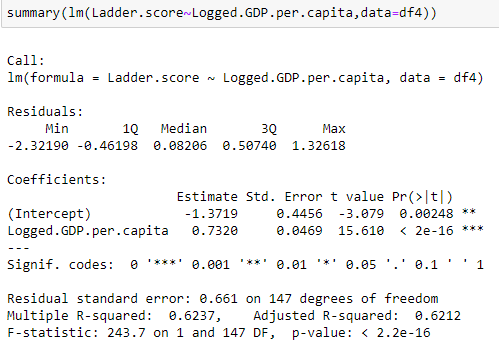

In [64]:
from IPython.display import Image
Image(filename='Linear_reg.png') 

### 13) The intercept Meaning
The intercept has no real important role because he is negative, and ladder score can only be between 0 to 10. We know that the reg line will intercept the y-axis in -1.3719, but it changes nothing because ladder score can't reach that number .

In [37]:
df['Ladder score'].min()

2.523

### 14) R-squared and Pearson's correlation
Both R-squared and Pearson's correlation coefficient are used to assess the strength of the relationship between two variables, but they are calculated differently and have different interpretations.<br>R-squared is used to assess the strength of the relationship in a linear regression model, while Pearson's correlation coefficient is used to assess the strength of the linear relationship between two variables in general.
<br> 

### R squared = ρ^2

In [38]:
x=df['Ladder score'].corr(df['Logged GDP per capita'])
print("Multiple R-squared : " , x**2)
print("Corr (ρ) : " , x) 

Multiple R-squared :  0.6237203782313985
Corr (ρ) :  0.7897596965098931


In the code above, we can see that R squared given to us from ρ^2 is equal to the R squared from R's program output.

### 15) 95% Confidence Interval 

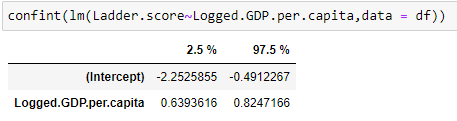

In [65]:
Image(filename='confint.png') 

 A) We can say that in 95% confidence, β1 will be between 0.6393 to 0.8247166. Furthermore our β1 is the average between them.<br>
 B) The upper bound of the confidence interval is β1+t * Std.error. <br> &nbsp;&nbsp;&nbsp;&nbsp;   The lower bound of the confidence interval is β1-t * Std.error. 
     (for 95%confint & t=2).

### 16) E(U|X)=E(U)=0. <br>
### For exmaple E(Healthy life expectancy|GDP per capita) = E(Healthy life expectancy) = 0. 
E(Healthy life expectancy|7) != E(Healthy life expectancy|10), we can infer that by looking at the correlation of 0.859461 between Healthy life expectancy to GDP per capita,, and in the scatter plot below.
#### In our opinion, assumption 4 does not hold at all in the data we selected, which prevents us from asserting a significant causal effect between the explanatory variable and our explained variable. We can see strong correlation between Logged GDP per capita to the other explanatory variables. <br>

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Healthy life expectancy'>

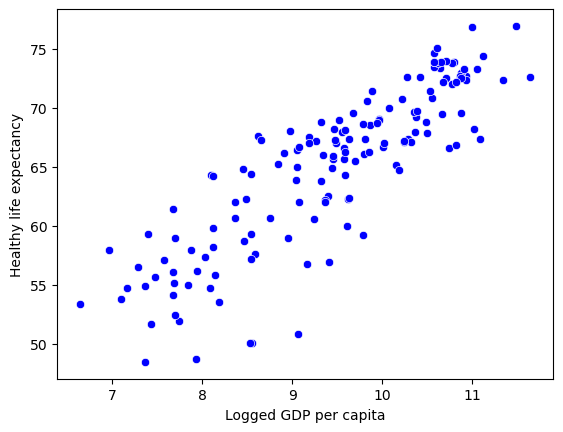

In [40]:
sns.scatterplot(y=df['Healthy life expectancy'],x=df['Logged GDP per capita'],color='blue')

In [41]:
df.loc[:,'Ladder score':'Freedom to make life choices'].corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323
Social support,0.756888,0.785299,1.000000,0.723256,0.482930
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000


<AxesSubplot:>

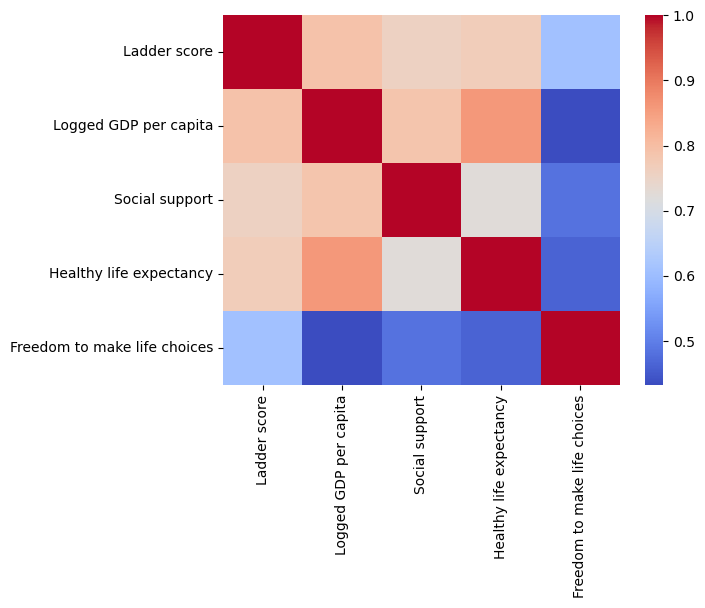

In [42]:
sns.heatmap(df.loc[:,'Ladder score':'Freedom to make life choices'].corr(),cmap='coolwarm')

### 17) Assumption number 2 : random sampling.
Our group discussed about assumption number 2 , And we remembered that Muti said in his lectures that the easiest way to disprove assumption number 2 is simply to show that the sample is not random. <br>
In the code below we can see every regional indicator and The number of samples from it, as we see, sub-Saharan Africa lead by far - 72% more than the second place, Western Europe. <br>
Such a situation can seriously bias our model, and make it unreliable!

In [43]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

It is possible for the recipient to be in a situation where we conduct research on families from a certain neighborhood and try to draw conclusions about them, but we sample many more samples from a certain family than from the other families. Our study does have a significant limitation - the number of countries in the world is very limited(193). We would propose a solution to the problem in that, although the sample size would decrease, we would try to take random and numerically balanced samples, and that way we would really be able to draw conclusions about the whole world!

### Asumption number 5 - Heteroskedasticity 
It's easy to infer that the VAR(U|X)=VAR(U) , furthermore we can conclude that there is not connection between the x value to the scatter around the regression line , he is permanent . <br>
Therefore we can assume that homoscedasticity exists.

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Ladder score'>

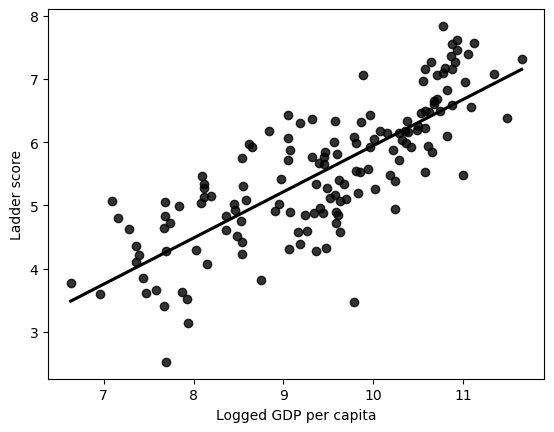

In [44]:
sns.regplot(y='Ladder score',x='Logged GDP per capita',data=df,color='black',ci=None)

### 18) Hypothesis testing

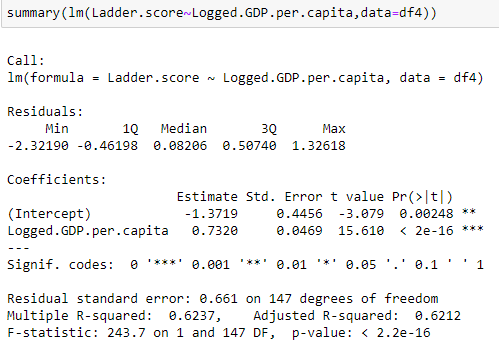

In [63]:
Image(filename='Linear_reg.png')

 We know that if Pvalue <  alpha , we can reject the null hypothesis .  <br> 
 H0 : β1=0.<br> H1 : β1!=0.
 Our Pvalue is 2e-16 = 0.00000000000000022, meaning it is very close to zero, thus we can reject the null hypothesis for all the alpha values (1%,5%,10%), and claim that by  1%,5%,10% level of significance  β1!=0 .


## 19) Confidence interval <br>
 In chapter 6 we got a confidence interval between [0.63936,0.824716] , according to our confidence interval, we can reject the null hypothesis of β1=0 , because our confidence interval if greater then 0 , in a 95% confidence level. That insight matches our insights from the hypothesis testing in the previous chapter, where we rejected the null hypothesis for a = 0.05. <br>
### In addition 
if |t|>1.65 we can reject the null hypothesis in 10% level of significance. <br>
if |t|>2 we can reject the null hypothesis in 5% level of significance. <br>
if |t|>2.6 we can reject the null hypothesis in 1% level of significance.  <br>
|t| = 15.61 , thus we can reject the null hypothesis for all the alpha values (1%,5%,10%) , as we mentioned before in chapter 18.


# Section number 3 
## 20) Dummy variable 
A)

In [47]:
df['dummy high'] = np.where(df['Social support by name']=='High', 1, 0)
df['dummy low'] = np.where(df['Social support by name']=='Low', 1, 0)

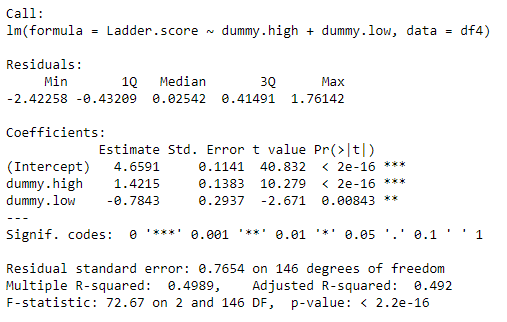

In [69]:
from IPython.display import Image
Image(filename='dummy_photo.png')

Ladder score = 4.6591 + 1.4215*(dummy.high) -0.7843*(dummy.low)<br>
<br>
B) The interpretation of the coefficients is that when the happiness index is "Medium" - meaning neither high nor low (receives a value of 0 in both columns) then the happiness index will be 4.6591.<br> If we get a value of 1 in "High" then 1.4215 units will be added to the happiness index.<br>
If we get a value of 1 in "low" then our happiness index will decrease by 0.7843.<br>
Both coefficients came out significant to an alpha of 10%.

C)Ladder score = 4.6591 + 1.4215*(dummy.high) -0.7843*(dummy.low) = 4.6591 + 1.4215 * 0 - 0.7843 * 1 = 3.875 <br>
<br>
D)

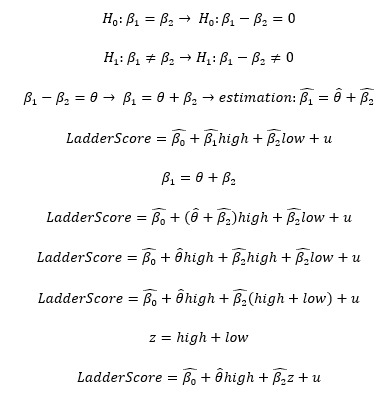

In [142]:
Image(filename='formulas.jpeg')

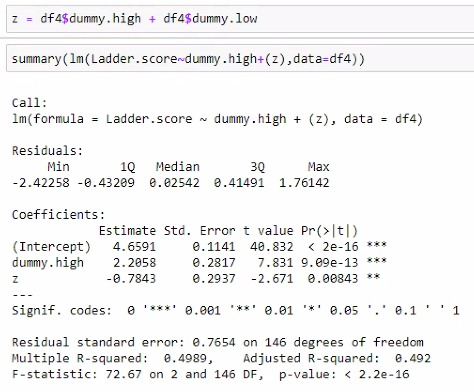

In [88]:
from IPython.display import Image
Image(filename='image.jpeg')

It can be seen that Z and dummy.high are significant for almost every level of significance (except below 0.1 percent), so we can reject the null hypothesis and claim that there is a clear difference between an observation that belongs to the high level and an observation that belongs to the low level!

## 21)  Multiple regression
We decided to add the Healthy life expectancy to the regression. <br>
A)

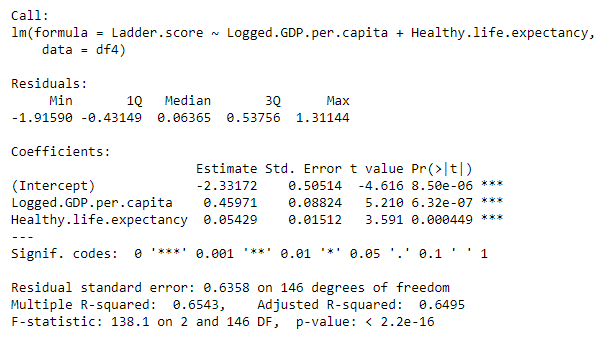

In [61]:
Image(filename='image1.png')

Ladder_score= -2.33172 + 0.45971 * (Logged.GDP.per.capita) + 0.05429 * (Healthy.life.expectancy)

B)The interpretation of the coefficients is that when we leave the healthy life expectancy as constant, every increase of a single percentage in Logged.GDP will increase our Ladder score by 0.45971/100 units.(because it's level-log) <br>
When the GDP is left constant, then every increase of one unit in the healthy life expectancy will increase our Ladder score by 0.05429. <br>
Both coefficients are significant and their direction is positive.


C)Single regression Logged.GDP.per.capita = 0.732 <br>
Multiple regression Logged.GDP.per.capita = 0.45971 <br> 
The two variables are positively correlated with each other, in addition the two variables are positively correlated with Ladder Score. <br>
In the lectures we learned that when a variable is omitted and in addition the Cov between the two explanatory variables is positive and when the coefficient of the omitted variable is also positive, then we will have an upward bias in the remaining variable. <br>
In this question we did not omit a variable but added it, and from this we can conclude that in the simple regression Logged GDP was biased upwards,And so its coefficient decreased after adding the variable! <br> 
The logical explanation of the change comes from the fact that it makes sense that life expectancy in rich countries would be higher than in countries that are not rich, and this effect came under the GDP when it was the only variable in the regression, but when we added the additional variable and essentially isolated its effect, then the effect of the country's wealth decreased because we were able to explain Another part!

D) Single regression Logged.GDP.per.capita Std.Error= 0.0469 <br>
Multiple regression Logged.GDP.per.capita Std.Error = 0.08824 <br> 
It can be seen that the standard deviation of the residuals increased in the simple model to the complex model from 0.661 to 0.7654, the root of the sum of the differences of x from the average x squared does not change, so what changes is only the numerator and that is where the increase in SE of the coefficient of x1 comes from. <br>
In addition, this can be recognized by the increase in R Squared, which indicates an increase in ESS because TSS remains constant! and consequently an increase in the denominator in SE.<br>
E) first Residual standard error 0.6358 <br> second Residual standard error 0.661

In [90]:
print("first ESS " , (0.661)**2*(149-2))
print("second ESS", (0.6358)**2*(149-3)) 
print("The outputs of ESS are indeed identical to the outputs in the ANOVA table!")

first ESS  64.22738700000001
second ESS 59.019279440000005
The outputs of ESS are indeed identical to the outputs in the ANOVA table!


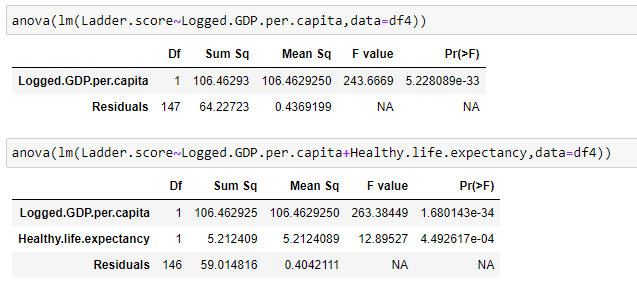

In [62]:
Image(filename='anova.png')

## 22) Full model linear regression 
##### The explanatory variables for the full regression are:<br>
Logged GDP per capita<br>Healthy life expectancy<br>Social support<br>Freedom to make life choices<br>Perceptions
of corruption. <br>
at the begining We left them all as the original data unchanged, there was no reason to perform a transformation.

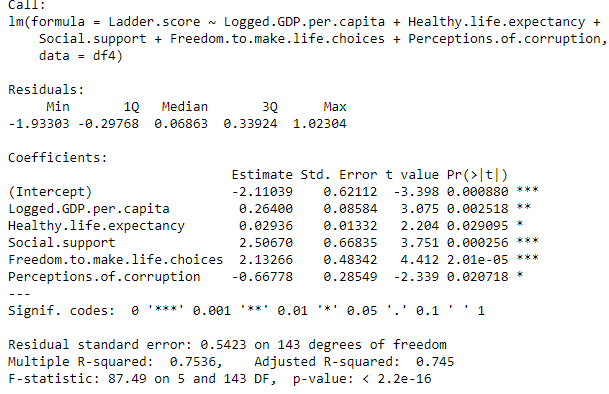

In [60]:
Image(filename='full_reg.png')

We noticed that the freedom to make life choices and social support and perceptions of corruption in the index between 0-1 and this situation causes their coefficient to be too high and it is difficult to check their influence in such a situation, therefore we performed a linear transformation and multiplied both columns by 10.

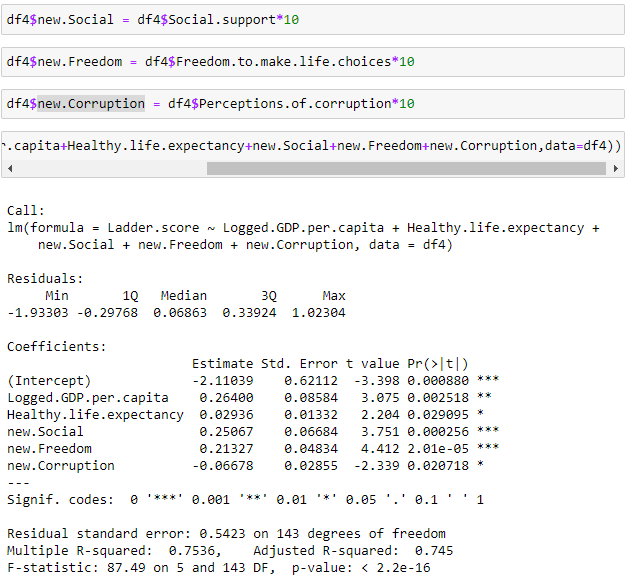

In [72]:
Image(filename='new_reg.png')

It can be seen that all our variables came out significant at least by 5%, also our model came out significant with a minimal p-value. It can be seen that R Squared has improved compared to the first model and in addition to the second model, and that the adjusted R Squared has also improved (we know that this is the indicator that is important to look at when adding and removing variables).<br> 
We did not encounter multicollinearity in our model, since none of our variables is a linear transformation of each other. <br> 
##### Work process : 
We started from the situation of a regression with 2 explanatory variables (the previous section), the work process had a deep thought of which variables might indeed explain the happiness in the countries in the most qualitative and correct way. We were not surprised to find that variables such as "social support" and "freedom to make life choices" would have a positive and significant effect on happiness in countries. <br> 
A surprise we found in the data is that the effect of the perception of corruption does not have as great an effect as the other variables, and its effect on the level of happiness is quite minimal. We were sure that the effect of corruption would be much higher since it can cause many disruptions in government, tyranny and thus lead to great disappointment among the residents.<br>
It can be seen that the main influencing factors in the model we estimated are - the level of wealth of the country, the social support that the individual receives and his freedom to make choices in life - overall this is not a surprising result since these are indeed significant factors that affect life in a significant way!


## 23) The coefficient of the main explanatory variable


## 24 ) Multiple regression hypothesis test 
The null hypothesis for this test is that all of the regression coefficients are equal to zero, meaning that the predictors do not have a significant linear relationship with the outcome variable. The alternative hypothesis is that at least one of the regression coefficients is non-zero, meaning that at least one predictor has a significant linear relationship with the outcome variable.<br>
<br>
If each individual predictor variable in a multiple regression model is statistically significant (i.e., has a p-value less than the chosen level of significance, typically 0.05), it does not necessarily mean that the entire regression model is significant. We still need to conduct an F-test to test the overall significance of the model.
<br> <br> 
On the other hand, if the p-value for the entire regression model is less than the chosen level of significance (α), then we can conclude that the overall regression model is statistically significant. However, this does not necessarily mean that all of the individual predictor variables are significant.
<br> <br>  <br> 
H0 : β1 = β2 = β3 = β4 = β5 = 0 . <br> <br> <br> 
H1 : β1 || β2 || β3 || β4 || β5 != 0 . 
<br> <br>  <br> 
Our P-value = 2.2e-16 , thus we can reject the null hypothesis for a = 1% & 5% & 10%. (P-value is enormously small).

## 25) Ways to justify the assumption of zero conditional expectation of the random disturbances 
W e can collect additional data on variables that can affect the relationship between the independent and dependent variables. For instance, we might collect data on cultural, social, or environmental factors that might have an impact the independent and dependent variables.
<br>
In addition to the original explanatory variables, we might consider adding other variables that could impact the Ladder score.potential variables can be:
<br><br>
Education - higher levels of education are often associated with greater well-being, which could impact Ladder score.<br><br>
Employment - factors such as job security and income can also impact well-being and could be included as explanatory variables.<br><br>
Gender - gender can impact access to resources and social support, which could impact Ladder score.<br><br>
Age - different age groups might have varying levels of well-being, and including age as a variable could help to capture this effect.<br><br>
Marital status - social support and relationship quality could impact Ladder score, so including marital status as a variable might be useful.<br><br>
Health status - in addition to healthy life expectancy, other factors such as chronic illness or disability could impact well-being and should be considered.<br><br>
By including these variables, we may be able to explain some of the unexplained variance in the dependent variable and improve the prediction of our model.
<br>
We can also conduct various tests to ensure the quality of our model. For instance, we can test for omitted variable bias by adding additional variables to the model and seeing if the coefficients of the original variables would change like we did in out previous exercise clauses . If they do, then we might need to add those variables to our model to improve the accuracy of our results. We can also test for heteroscedasticity, which means that the variance of the error term is not constant across observations.
<br>
Although the quality of the model we received is definitely high, there are several other variables that can explain the random disturbances of our model, for example, these could include variables like income inequality, access to healthcare, environmental factors that impact people, political stability and Cultural factors. By including these variables, we may be able to explain some of the unexplained variation and improve the predictive power of our model.
<br> <br>
In conclusion, to justify the existence of a causal effect in the linear regression model , we need to collect additional data, We can also consider adding other explanatory variables such as education, employment, gender, age, marital status, and health status to the model, and We can make tests like omitted variable bias and heteroscedasticity.

## Bonus section 

In [134]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [135]:
init_notebook_mode(connected=True) 

In [140]:
data = dict(
        type = 'choropleth',
        locations = df2['Alpha-3 code'],
        z = df['Ladder score'],
        text = df['Country name'],
        colorbar = {'title' : 'Ladder Score'},
      ) 

In [137]:
layout = dict(
    title = '2020 World happiness report',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [141]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [139]:
df2 = pd.merge(df1, country_codes, on='Country name', how='outer')